In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv(r'C:\Users\hp\Downloads\Air_Quality.csv')

In [7]:
data

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0
...,...,...,...,...,...,...,...,...,...,...
1831,1832,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,10.0,22.0,15.0
1832,1833,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,1.0,3.0,2.0
1833,1834,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",SO2,21-10-2021 01:00:00,6.0,28.0,10.0
1834,1835,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",CO,21-10-2021 01:00:00,34.0,92.0,41.0


In [9]:
data.isnull().sum()

id                0
country           0
state             0
city              0
station           0
pollutant_id      0
last_update       0
pollutant_min    98
pollutant_max    98
pollutant_avg    98
dtype: int64

In [10]:
data.describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,1836.000000,1738.000000,1738.000000,1738.000000
mean,918.500000,28.414269,96.873418,54.100690
std,530.151865,34.403811,104.765094,60.824158
min,1.000000,1.000000,1.000000,1.000000
25%,459.750000,5.000000,21.000000,12.000000
50%,918.500000,14.000000,63.000000,31.000000
75%,1377.250000,39.000000,124.000000,70.000000
max,1836.000000,217.000000,500.000000,314.000000


missing values

In [20]:
data[(data['pollutant_min'].isnull())]

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
129,130,India,Delhi,Delhi,"Alipur, Delhi - DPCC",NH3,21-10-2021 01:00:00,NaN,NaN,NaN
134,135,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",PM10,21-10-2021 01:00:00,NaN,NaN,NaN
138,139,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",CO,21-10-2021 01:00:00,NaN,NaN,NaN
210,211,India,Delhi,Delhi,"Jahangirpuri, Delhi - DPCC",PM2.5,21-10-2021 01:00:00,NaN,NaN,NaN
211,212,India,Delhi,Delhi,"Jahangirpuri, Delhi - DPCC",PM10,21-10-2021 01:00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1815,1816,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",PM2.5,21-10-2021 01:00:00,NaN,NaN,NaN
1816,1817,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",PM10,21-10-2021 01:00:00,NaN,NaN,NaN
1817,1818,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,NaN,NaN,NaN
1818,1819,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,NaN,NaN,NaN


In [21]:
data.corr()

,id,pollutant_min,pollutant_max,pollutant_avg
id,1.000000,-0.038355,-0.034367,-0.023175
pollutant_min,-0.038355,1.000000,0.788666,0.892249
pollutant_max,-0.034367,0.788666,1.000000,0.935664
pollutant_avg,-0.023175,0.892249,0.935664,1.000000


# Handling missing values
mean,median and KNN 

In [22]:
data['pollutant_min'].isnull().sum()

98

In [24]:
98/1836*100

5.337690631808279

In [44]:
n=data['pollutant_min']
n

0       69.0
1       82.0
2       10.0
3        4.0
4       16.0
        ... 
1831    10.0
1832     1.0
1833     6.0
1834    34.0
1835    10.0
Name: pollutant_min, Length: 1836, dtype: float64

In [27]:
mean=data['pollutant_min'].mean()

In [51]:
m=n.fillna(mean)

In [52]:
m.isnull().sum()
m=pd.DataFrame(m)

In [70]:
n.isnull().sum()
n=pd.DataFrame(n)
n

,pollutant_min
0,69.0
1,82.0
2,10.0
3,4.0
4,16.0
...,...
1831,10.0
1832,1.0
1833,6.0
1834,34.0


In [71]:
n.isnull().sum()

pollutant_min    98
dtype: int64

In [77]:
n.rename(columns={'pollutant_min':'missing_value'},inplace=True)

In [78]:
n

,missing_value
0,69.0
1,82.0
2,10.0
3,4.0
4,16.0
...,...
1831,10.0
1832,1.0
1833,6.0
1834,34.0


In [79]:
m.rename(columns={'pollutant_min':'impute_mean_value'},inplace=True)

In [80]:
m

,impute_mean_value
0,69.0
1,82.0
2,10.0
3,4.0
4,16.0
...,...
1831,10.0
1832,1.0
1833,6.0
1834,34.0


<AxesSubplot:ylabel='Density'>

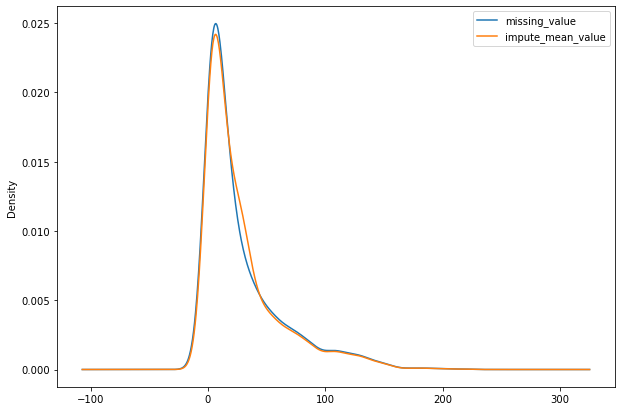

In [134]:
ax,legend=(['l1','l2'])
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
n.plot.kde(ax=ax,)
m.plot.kde(ax=ax)

In [84]:
median =data['pollutant_min'].median()
median

14.0

In [115]:
l=data['pollutant_min']

In [116]:
l = l.fillna(median)

In [117]:
l

0       69.0
1       82.0
2       10.0
3        4.0
4       16.0
        ... 
1831    10.0
1832     1.0
1833     6.0
1834    34.0
1835    10.0
Name: pollutant_min, Length: 1836, dtype: float64

In [118]:
l= pd.DataFrame(l)
l

,pollutant_min
0,69.0
1,82.0
2,10.0
3,4.0
4,16.0
...,...
1831,10.0
1832,1.0
1833,6.0
1834,34.0


In [119]:
l.rename(columns={'pollutant_min':'impute_median_missing_value'},inplace =True)

In [123]:
k=data['pollutant_min']

k = pd.DataFrame(k)

In [124]:
k.rename(columns={'pollutant_min':'missing_value'},inplace =True)

In [91]:
print(l.isnull().sum())
print(k.isnull().sum())

pollutant_min    0
dtype: int64
98


In [125]:
k

,missing_value
0,69.0
1,82.0
2,10.0
3,4.0
4,16.0
...,...
1831,10.0
1832,1.0
1833,6.0
1834,34.0


<AxesSubplot:ylabel='Density'>

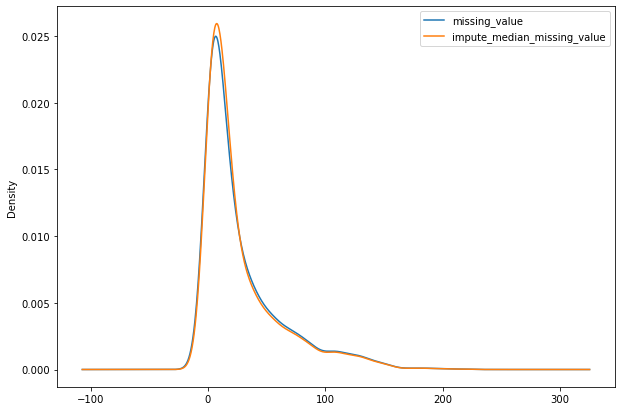

In [126]:
ax,legend=(['l1','l2'])
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
k.plot.kde(ax=ax)
l.plot.kde(ax=ax)


check impute mean variation 

In [131]:
print(n.var())
print(m.var())

missing_value    1183.62218
dtype: float64
impute_mean_value    1120.40966
dtype: float64


check impute median variation

In [130]:
print(k.var())
print(l.var())

missing_value    1183.62218
dtype: float64
impute_median_missing_value    1130.913603
dtype: float64


In [169]:
from sklearn.impute import KNNImputer 

In [281]:
knn =KNNImputer()
py=knn.fit_transform([y])

In [295]:
from sklearn.impute import KNNImputer 
knn =KNNImputer( n_neighbors=2)
py=knn.fit_transform(data[['pollutant_min']])

In [300]:
data['pollutant_min'] = py

# KNN impute handling missing values

<AxesSubplot:ylabel='Density'>

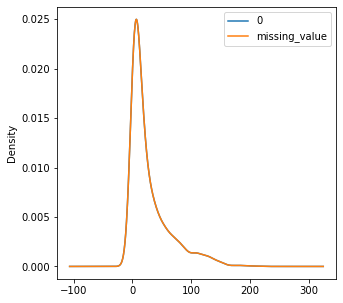

In [286]:
ax,legend=(['l1','l2'])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
d.plot.kde(ax=ax)
n.plot.kde(ax=ax)


In [301]:
data['pollutant_min'].isnull().sum()

0

In [302]:
from sklearn.impute import KNNImputer 
knn =KNNImputer( n_neighbors=2)
py1=knn.fit_transform(data[['pollutant_max']])

In [303]:
data['pollutant_max'] = py1

In [305]:
from sklearn.impute import KNNImputer 
knn =KNNImputer( n_neighbors=2)
py2=knn.fit_transform(data[['pollutant_avg']])

In [306]:
data['pollutant_avg'] = py2

In [307]:
data.isnull().sum()

id               0
country          0
state            0
city             0
station          0
pollutant_id     0
last_update      0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [308]:
data.corr()

,id,pollutant_min,pollutant_max,pollutant_avg
id,1.000000,-0.037360,-0.033475,-0.022574
pollutant_min,-0.037360,1.000000,0.788666,0.892249
pollutant_max,-0.033475,0.788666,1.000000,0.935664
pollutant_avg,-0.022574,0.892249,0.935664,1.000000


# visualization

In [309]:
data.columns

Index(['id', 'country', 'state', 'city', 'station', 'pollutant_id',
       'last_update', 'pollutant_min', 'pollutant_max', 'pollutant_avg'],
      dtype='object')

In [313]:
data['country'].value_counts()

India    1836
Name: country, dtype: int64

In [317]:
color=['#190033','#330019','#660066','#330066','#003366','#006666']

# count of all country

Text(0.5, 1.0, 'COUNTS OF COUNTRY')

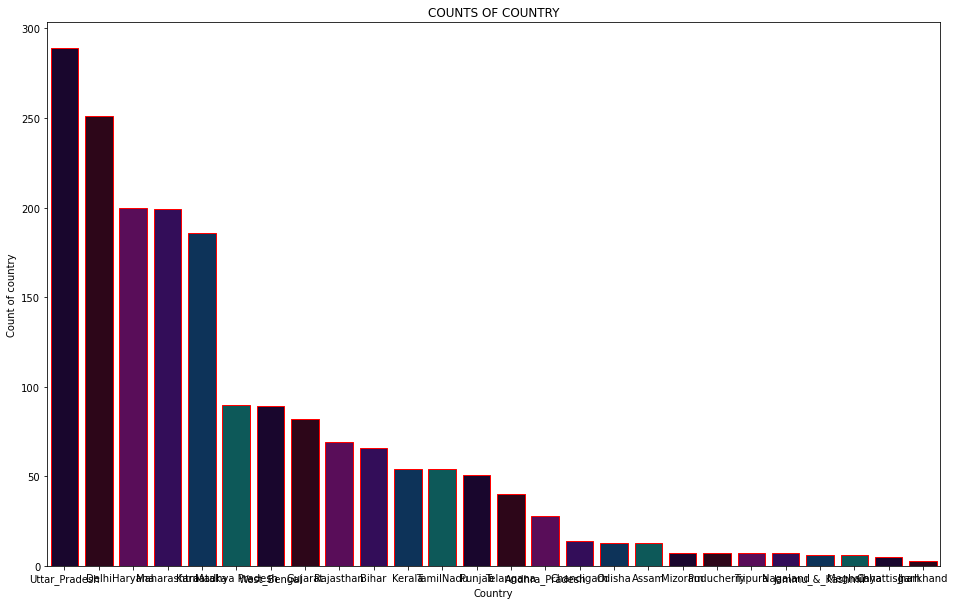

In [327]:

fig = plt.figure(figsize=(16,10))
sns.barplot(x=data['state'].value_counts().index,y=data['state'].value_counts().values,palette=color,edgecolor='#FF0000')
plt.xlabel('Country')
plt.ylabel('Count of country')
plt.title('COUNTS OF COUNTRY')

# EACH STATE COUNTS OF STATION

In [334]:
counts_of_station = data.groupby(['state'])['station'].count()

In [336]:
count_of_stations = counts_of_station.reset_index()

In [344]:
count_of_stations=count_of_stations.sort_values('station',ascending=False)

Text(0.5, 1.0, 'Each state of total station')

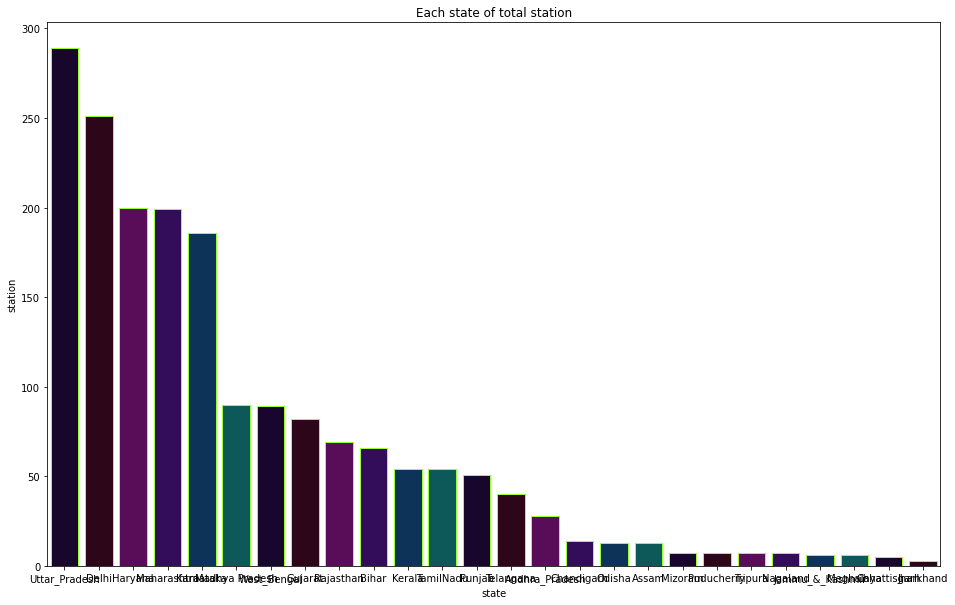

In [345]:
fig = plt.figure(figsize=(16,10))
sns.barplot(x = count_of_stations['state'],y=count_of_stations['station'], palette = color,edgecolor = '#99FF33')
plt.xlabel('state')
plt.ylabel('station')
plt.title('Each state of total station')

# Each city counts of station

In [348]:
city_station = data.groupby(['city'])['station'].count()

In [350]:
city_station=city_station.reset_index()

In [354]:
city_station=city_station.sort_values('station',ascending=False)

Text(0.5, 1.0, 'each city counts of station')

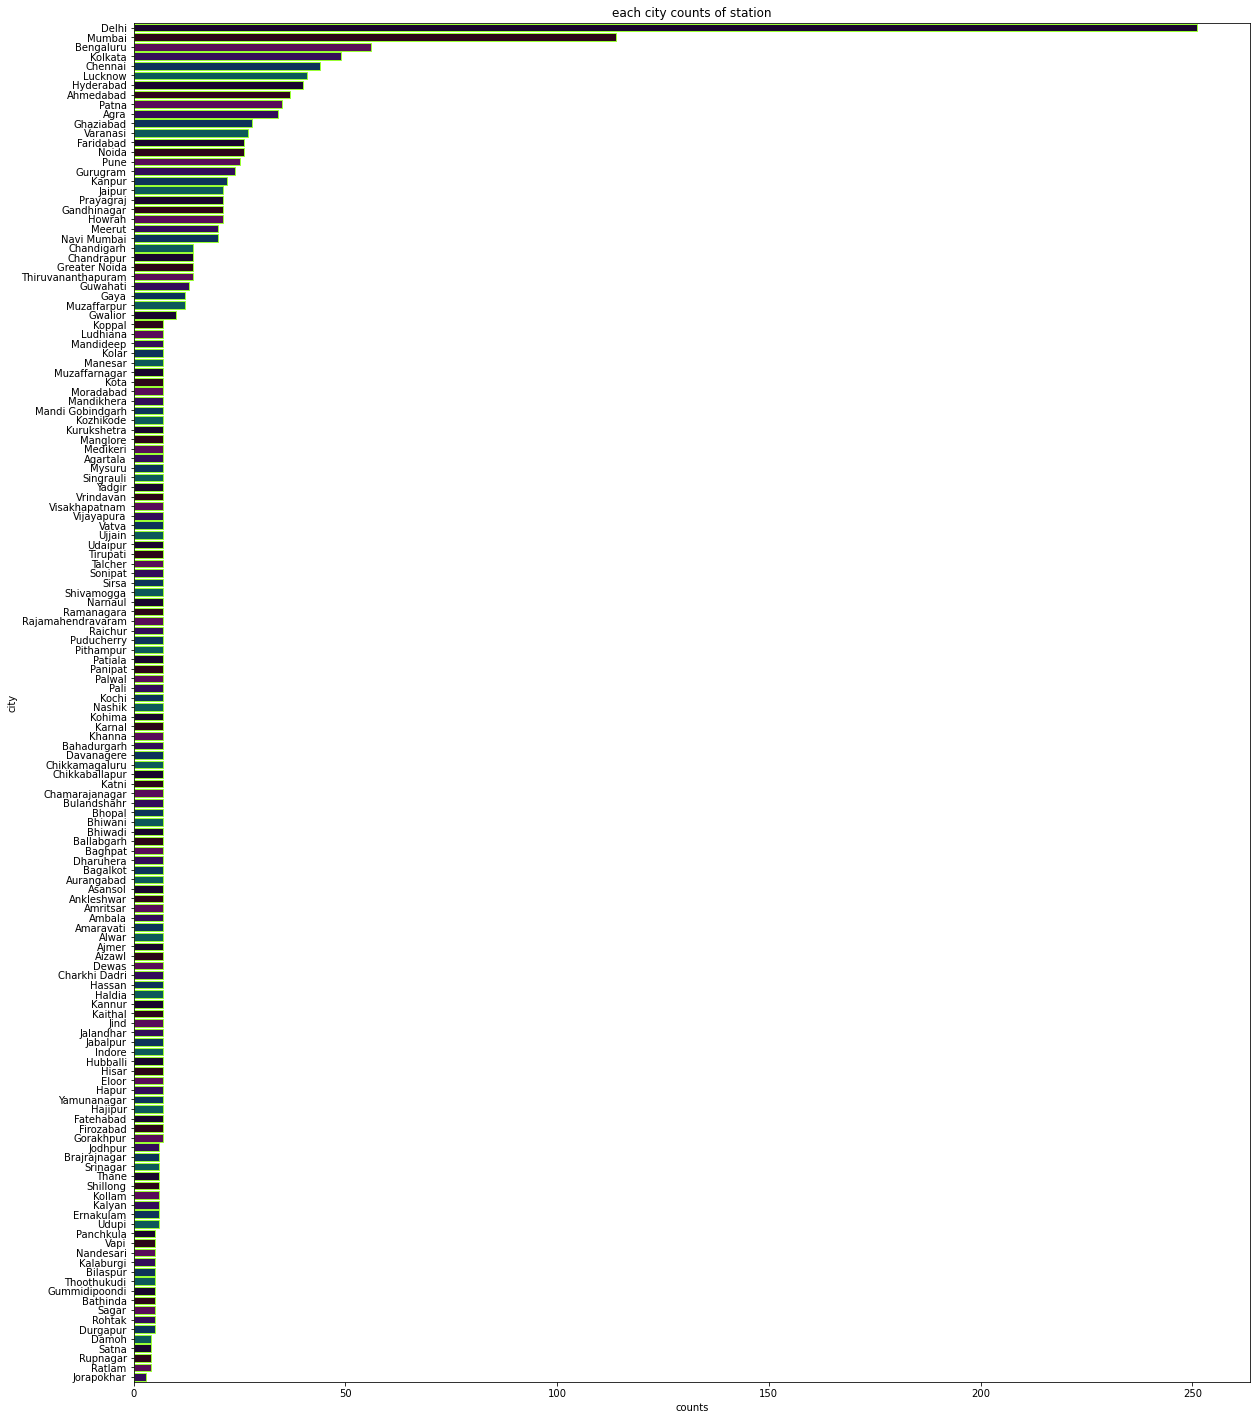

In [363]:

fig = plt.figure(figsize=(20,25))
sns.barplot(y=city_station['city'],x=city_station['station'], palette = color,edgecolor = '#99FF33')
plt.xlabel('counts')
plt.ylabel('city')
plt.title('each city counts of station')

# Min pollutant of each city

In [369]:
city_min_pollutant=data.groupby(['city'])['pollutant_min'].sum()

In [372]:
city_min_pollutant=city_min_pollutant.reset_index()

In [375]:
city_min_pollutant=city_min_pollutant.sort_values('pollutant_min',ascending=False)

Text(0.5, 1.0, 'each  city pollutant min')

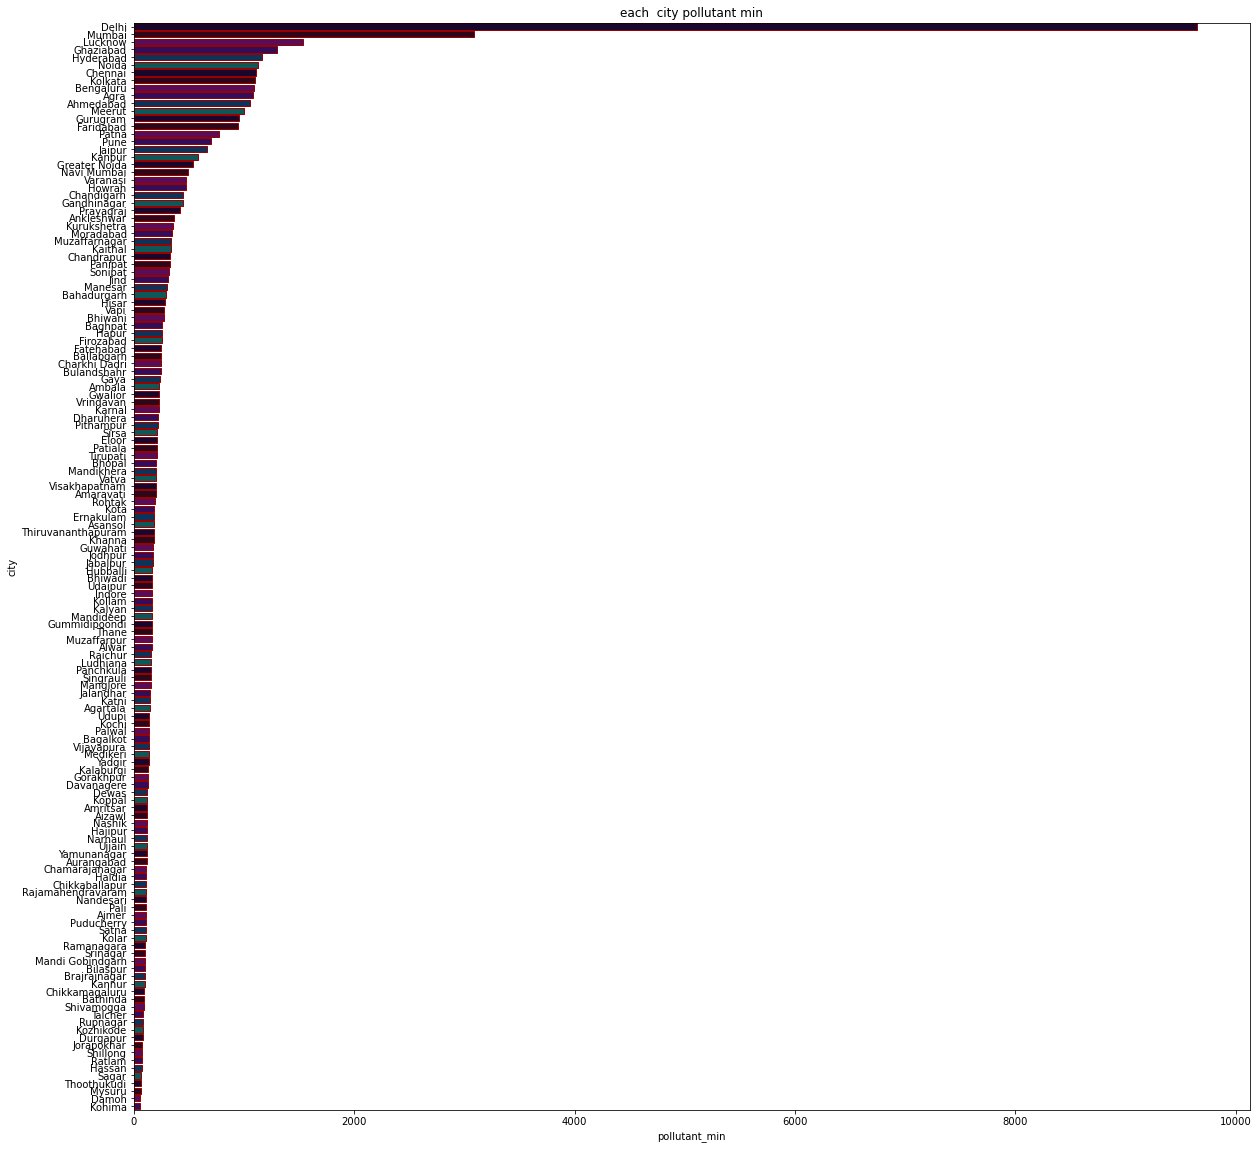

In [378]:
fig = plt.figure(figsize=(20,20))
sns.barplot(y=city_min_pollutant['city'],x=city_min_pollutant['pollutant_min'], palette = color,edgecolor = '#990000')
plt.ylabel('city')
plt.xlabel('pollutant_min')
plt.title('each  city pollutant min')

# Each city pollutant avg

In [380]:
city_avg = data.groupby(['city'])['pollutant_avg'].sum()

In [382]:
city_avg=city_avg.reset_index()

In [384]:
city_avg=city_avg.sort_values('pollutant_avg',ascending = False)

Text(0.5, 1.0, 'each  city pollutant avg')

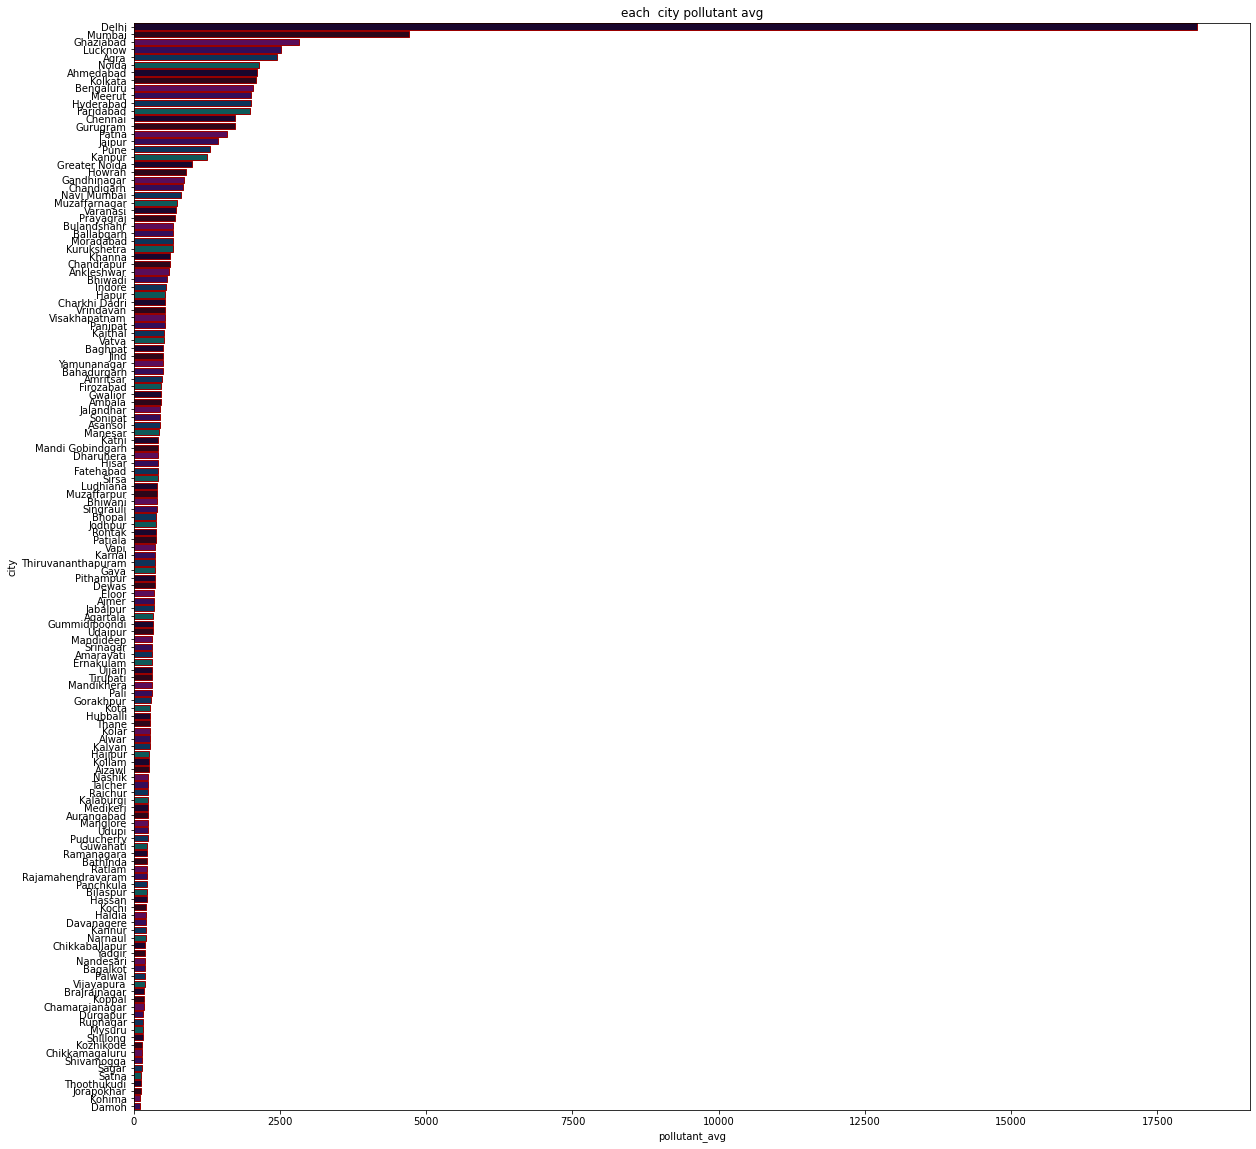

In [387]:
fig = plt.figure(figsize=(20,20))
sns.barplot(y=city_avg['city'],x=city_avg['pollutant_avg'],palette = color,edgecolor = '#990000')
plt.ylabel('city')
plt.xlabel('pollutant_avg')
plt.title('each  city pollutant avg')

In [392]:
station = data.groupby(['state'])['station'].count()

In [395]:
station =station.reset_index()

In [393]:
poll = data.groupby(['state'])['pollutant_avg'].sum()

In [396]:
poll = poll.reset_index()

In [398]:
state_station_pollutant = station.merge(poll)

In [400]:
state_station_pollutant.head(2)

,state,station,pollutant_avg
0,Andhra_Pradesh,28,1389.0
1,Assam,13,233.0


Text(0.5, 1.0, 'Each city count of station and pollutant avg')

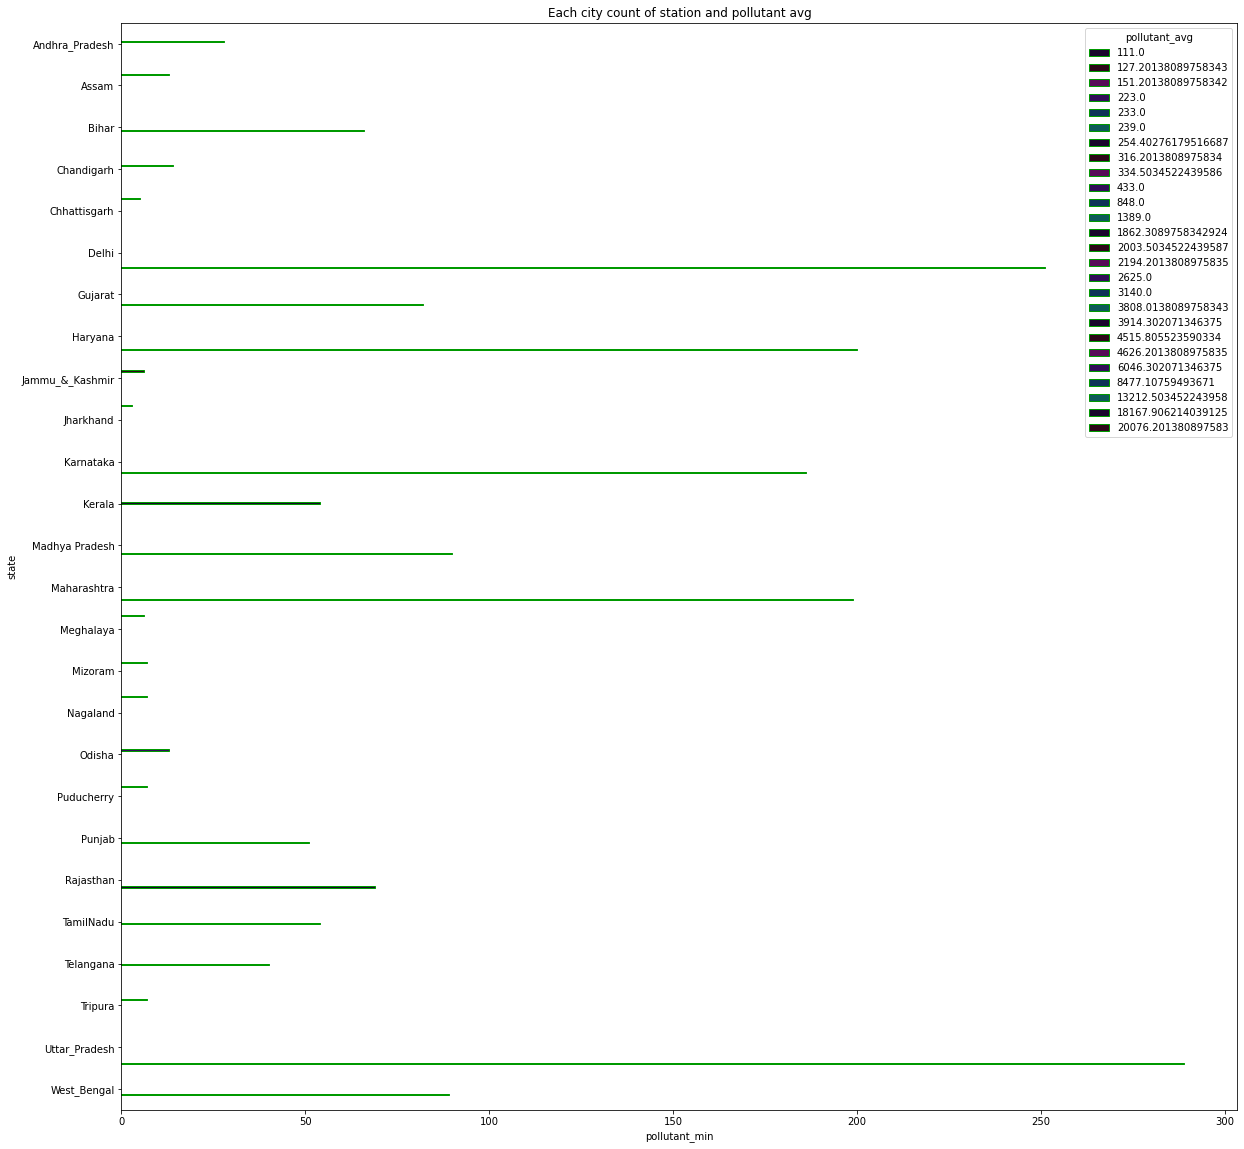

In [406]:
fig = plt.figure(figsize=(20,20))
sns.barplot(y=state_station_pollutant['state'],x=state_station_pollutant['station'],hue=state_station_pollutant['pollutant_avg'],palette = color,edgecolor = '#009900')
plt.ylabel('state')
plt.xlabel('pollutant_min')
plt.title('Each city count of station and pollutant avg' )